In [1]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("./node_data.csv")

# Katsotaan plotista suunilleen rajat kauppa alueelle

865194
-121431
142944
-408630


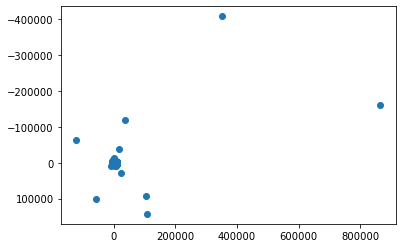

In [4]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-5000,15000,10000,-5000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(df.x, df.y, 'o')

print(df.x.max())
print(df.x.min())
print(df.y.max())
print(df.y.min())

In [2]:
from scipy.stats import zscore
from scipy import stats
df1 = df[['x','y']].copy()

z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = df[filtered_entries]
new_df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


5849
-2405
5033
-3636


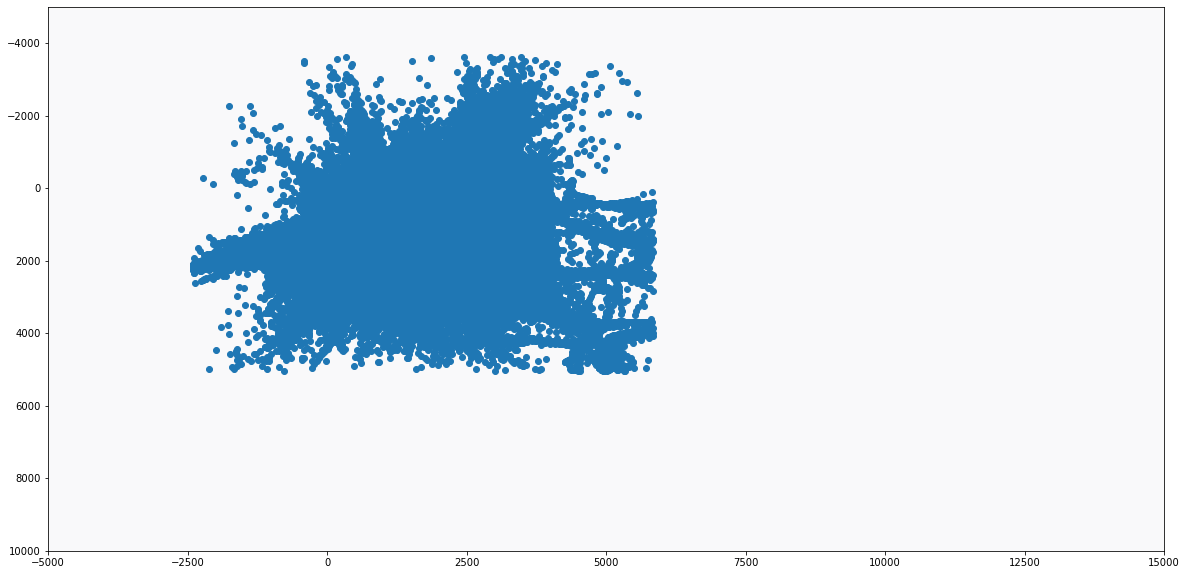

In [17]:
print(new_df.x.max())
print(new_df.x.min())
print(new_df.y.max())
print(new_df.y.min())

img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-5000,15000,10000,-5000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(new_df.x, new_df.y, 'o')

In [3]:
import import_ipynb
from XY_Diskretisointi import *

new_df = xy_to_grid(new_df,new_df.x,new_df.y, 10)
new_df

importing Jupyter notebook from XY_Diskretisointi.ipynb


XY_Diskretisointi.ipynb:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {


,Unnamed: 0,node_id,timestamp,x,y,z,q,x_grid,y_grid
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0,6,3
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0,6,3
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0,6,3
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0,6,3
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0,6,3
...,...,...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0,3,5
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0,3,5
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0,3,5
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0,3,5


In [22]:
new_df['timestamp'] = new_df['timestamp'].astype(str)
new_df['timestamp'] = new_df['timestamp'].str.slice(2, -7)
new_df['timestamp'] = new_df['timestamp'].astype('datetime64[ns]')
new_df.timestamp = new_df.timestamp.dt.round("ms")
new_df

,Unnamed: 0,node_id,timestamp,x,y,z,q
6.3,0,b'-2393099149039893833',2020-06-24 12:20:08.533,2762,-257,100,0
6.3,1,b'-2393099149039893833',2020-06-24 12:20:08.620,2870,-344,100,0
6.3,2,b'-2393099149039893833',2020-06-24 12:20:09.623,2916,-344,100,0
6.3,3,b'-2393099149039893833',2020-06-24 12:20:09.623,2894,-254,100,0
6.3,4,b'-2393099149039893833',2020-06-24 12:20:10.116,2888,-188,100,0
...,...,...,...,...,...,...,...
3.5,13890901,b'4996252679627069957',2020-06-01 03:00:05.469,635,1064,0,0
3.5,13890902,b'4996252679627069957',2020-06-01 03:00:06.479,681,760,0,0
3.5,13890903,b'4996252679627069957',2020-06-01 03:00:08.507,622,991,0,0
3.5,13890904,b'4996252679627069957',2020-06-01 03:00:09.548,644,1066,0,0


In [24]:
new_df = new_df.drop_duplicates(subset=['node_id','timestamp'], keep='first')
new_df

,Unnamed: 0,node_id,timestamp,x,y,z,q
6.3,0,b'-2393099149039893833',2020-06-24 12:20:08.533,2762,-257,100,0
6.3,1,b'-2393099149039893833',2020-06-24 12:20:08.620,2870,-344,100,0
6.3,2,b'-2393099149039893833',2020-06-24 12:20:09.623,2916,-344,100,0
6.3,4,b'-2393099149039893833',2020-06-24 12:20:10.116,2888,-188,100,0
6.3,5,b'-2393099149039893833',2020-06-24 12:20:11.086,2910,-200,100,0
...,...,...,...,...,...,...,...
3.5,13890901,b'4996252679627069957',2020-06-01 03:00:05.469,635,1064,0,0
3.5,13890902,b'4996252679627069957',2020-06-01 03:00:06.479,681,760,0,0
3.5,13890903,b'4996252679627069957',2020-06-01 03:00:08.507,622,991,0,0
3.5,13890904,b'4996252679627069957',2020-06-01 03:00:09.548,644,1066,0,0


In [27]:
day1 = new_df.loc[(new_df['timestamp'].dt.day==26) & (new_df['timestamp'].dt.month==6) & (new_df['timestamp'].dt.year==2020)]

img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(0,10,0,10),aspect='auto')
plt.grid()
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(day1.x, day1.y, 'o')

Error in callback <function flush_figures at 0x7fa5d7857170> (for post_execute):


KeyboardInterrupt: 